In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("C:/Users/gokay/OneDrive/Masa√ºst√º/DerinOgrenme_1/DerinOgrenme_Dersler/Derin Ogrenme 5/2) Convolutional Neural Network/train.csv")
print(train.shape)
train.head()

(42000, 785)


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
test = pd.read_csv("C:/Users/gokay/OneDrive/Masa√ºst√º/DerinOgrenme_1/DerinOgrenme_Dersler/Derin Ogrenme 5/2) Convolutional Neural Network/test.csv")
print(test.shape)
test.head()

(28000, 784)


pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [4]:
Y_train = train["label"]
X_train = train.drop(labels=["label"],axis=1)
# labellarƒ±m Ytrain oluyor geriye kalan pixellerde xtrain

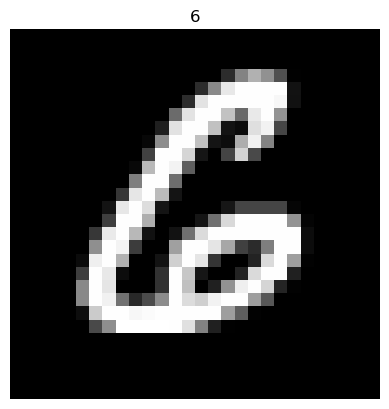

In [5]:
img = X_train.iloc[767].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap="gray")
plt.title(train.iloc[767,0]) # 767. satƒ±rƒ±ndaki 0. s√ºtunu alƒ±r yani label
plt.axis("off")
plt.show()

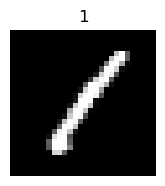

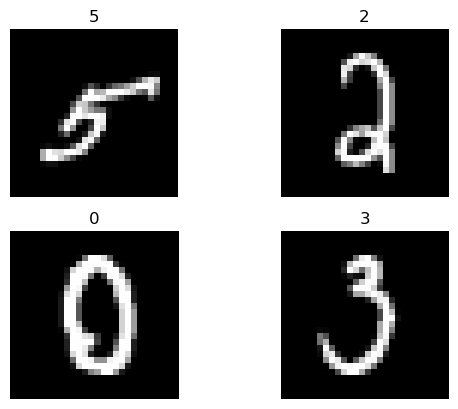

In [6]:
plt.subplot(2,3,1)
img = X_train.iloc[0].to_numpy().reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()


plt.subplot(2,2,1)
img1 = X_train.iloc[571].to_numpy().reshape(28,28)
plt.imshow(img1,cmap="gray")
plt.title(train.iloc[571,0])
plt.axis("off")

plt.subplot(2,2,2)
img2=X_train.iloc[572].to_numpy().reshape(28,28)
plt.imshow(img2,cmap="gray")
plt.title(train.iloc[572,0])
plt.axis("off")

plt.subplot(2,2,3)
img3=X_train.iloc[1881].to_numpy().reshape(28,28)
plt.imshow(img3,cmap="gray")
plt.title(train.iloc[1881,0])
plt.axis("off")

plt.subplot(2,2,4)
img4=X_train.iloc[2025].to_numpy().reshape(28,28)
plt.imshow(img4,cmap="gray")
plt.title(train.iloc[2025,0])
plt.axis("off")
plt.show()

<a id="2"></a>
## Normalizasyon, Yeniden ≈ûekillendirme ve Etiket Kodlama
* Normalizasyon
    * Aydƒ±nlatmadaki farklƒ±lƒ±klarƒ±n etkisini azaltmak i√ßin gri tonlama normalizasyonu yapƒ±yoruz.
    * Normalizasyon yaparsak, CNN daha hƒ±zlƒ± √ßalƒ±≈üƒ±r.
* Yeniden ≈ûekillendirme
    * Eƒüitim ve test g√∂r√ºnt√ºleri (28 x 28)
    * T√ºm verileri 28x28x1 3D matrislerine yeniden ≈üekillendiriyoruz.
    * Keras 28x28x1 ≈üeklinde √ßalƒ±≈üƒ±yor , 1 anlamƒ± grayscale , eƒüer 28x28 dersek keras bunu anlamaz 
    * Keras, kanallara kar≈üƒ±lƒ±k gelen son bir boyuta ihtiya√ß duyar. G√∂r√ºnt√ºlerimiz gri tonlamalƒ± olduƒüu i√ßin sadece bir kanal kullanƒ±lƒ±r.
* Etiket Kodlama  
    * Etiketleri one hot vekt√∂rlerine kodlayƒ±n
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]


In [7]:
X_train = X_train / 255.0
test = test / 255.0

print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [8]:
# Gri tonlu veriyi 3 kanallƒ± RGB'ye d√∂n√º≈üt√ºrme
# ResNet modeli  RGB (3 kanallƒ±) g√∂r√ºnt√ºlerle √ßalƒ±≈üacak ≈üekilde tasarlanmƒ±≈ütƒ±r.
X_train = X_train.values.reshape(-1, 28, 28, 1)  # (28,28,1)
X_train = np.stack((X_train.squeeze(),) * 3, axis=-1)  # (28,28,3)
test = test.values.reshape(-1, 28, 28, 1)
test = np.stack((test.squeeze(),) * 3, axis=-1) 



X_train.squeeze()
squeeze() fonksiyonu, veri setindeki gereksiz boyutlarƒ± (yani, 1 olan boyutlarƒ±) kaldƒ±rƒ±r. Eƒüer X_train veri seti (N, 28, 28, 1) boyutlarƒ±nda ise, squeeze() fonksiyonu bu 1 olan boyutu kaldƒ±rarak X_train'i (N, 28, 28) boyutlarƒ±na d√∂n√º≈üt√ºr√ºr.
np.stack((X_train.squeeze(),) * 3, axis=-1)
Bu satƒ±rda X_train.squeeze() fonksiyonu ile elde edilen her bir 28x28 boyutundaki gri tonlu (single-channel) g√∂rseli √º√ß defa kopyalar.

(X_train.squeeze(),) * 3 ifadesi, X_train.squeeze() g√∂r√ºnt√ºs√ºn√º √º√ß kez tekrar eder. Yani, √º√ß tane 28x28'lik g√∂rsel elde edilir.

np.stack(..., axis=-1) ise bu √º√ß kopyayƒ± son boyutta (kanal boyutu) birle≈ütirir. Bu i≈ülem sonucunda, her bir g√∂rsel (28, 28, 3) boyutunda olacak ≈üekilde, √º√ß kanal (R, G, B) i√ßerir.

In [10]:
# X_train ve X_val i√ßin manuel yeniden boyutlandƒ±rma
import cv2
X_train = np.array([cv2.resize(img, (32, 32)) for img in X_train])



In [11]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train,num_classes=10)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,random_state=2,test_size=0.1)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 32, 32, 3)
x_test shape (4200, 32, 32, 3)
y_train shape (37800, 10)
y_test shape (4200, 10)


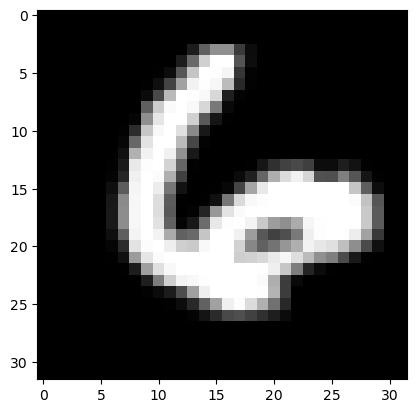

In [13]:
# Bazƒ± √∂rnekler
plt.imshow(X_train[2232][:,:,0],cmap='gray')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.applications import ResNet50
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential , Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import BatchNormalization

# ResNet modeli girdiyi 32x32 veya daha √ºst√º bekler
resnet_base = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))

# Modelin √ºzerine kendi sƒ±nƒ±flandƒ±rma katmanlarƒ±mƒ±zƒ± ekliyoruz
x = resnet_base.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

In [15]:
resnet_model = Model(inputs=resnet_base.input, outputs=output)


In [16]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

In [17]:
epochs = 20  # Sonu√ßlarƒ±n daha iyi olmasƒ± i√ßin epoch sayƒ±sƒ±nƒ± artƒ±rƒ±n
batch_size = 250

In [18]:

#Model Summary
print(resnet_model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [19]:
# VERƒ∞ ARTTIRMA
# Veri artƒ±rma i≈ülemi
datagen = ImageDataGenerator(
        featurewise_center=False,  # veri seti √ºzerinde giri≈ü ortalamasƒ±nƒ± 0'a ayarla
        samplewise_center=False,  # her √∂rneƒüin ortalamasƒ±nƒ± 0'a ayarla
        featurewise_std_normalization=False,  # veri setinin std ile giri≈üleri b√∂l
        samplewise_std_normalization=False,  # her bir giri≈üi kendi std ile b√∂l
        zca_whitening=False,  # boyut azaltma i≈ülemi
        rotation_range=5,  # g√∂r√ºnt√ºleri rastgele 5 derece d√∂nd√ºr
        zoom_range = 0.1, # rastgele g√∂r√ºnt√ºleri %5 zoomla
        width_shift_range=0.1,  # g√∂r√ºnt√ºleri yatayda rastgele %5 kaydƒ±r
        height_shift_range=0.1,  # g√∂r√ºnt√ºleri dikeyde rastgele %5 kaydƒ±r
        horizontal_flip=False,  # g√∂r√ºnt√ºleri yatayda rastgele √ßevir
        vertical_flip=False)  # g√∂r√ºnt√ºleri dikeyde rastgele √ßevirme

datagen.fit(X_train)


Erken Durdurma (Early Stopping)
Nedir?
Erken durdurma, model eƒüitimi sƒ±rasƒ±nda doƒürulama kaybƒ± (val_loss) bir noktadan sonra artmaya ba≈üladƒ±ƒüƒ±nda eƒüitimi durdurma y√∂ntemidir. Bu durum, modelin eƒüitim setine a≈üƒ±rƒ± uyum saƒüladƒ±ƒüƒ±nƒ± (overfitting) g√∂sterir.

Nasƒ±l √áalƒ±≈üƒ±r?
Eƒüitim sƒ±rasƒ±nda train_loss d√º≈üerken, val_loss artmaya ba≈ülar.
Erken durdurma, val_loss deƒüerini takip eder ve belli bir s√ºre iyile≈üme olmazsa eƒüitimi sonlandƒ±rƒ±r.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping tanƒ±mlama
early_stopping = EarlyStopping(
    monitor='val_loss',  # ƒ∞zlenecek metrik
    patience=5,          # Beklenecek epoch sayƒ±sƒ± (iyile≈üme olmazsa durur)
    restore_best_weights=True  # En iyi aƒüƒ±rlƒ±klarƒ± geri y√ºkler
)




In [ ]:

# Modelin eƒüitimi
history = resnet_model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                           epochs=epochs, 
                           validation_data=(X_val, Y_val),
                           steps_per_epoch=X_train.shape[0] // batch_size,
                           callbacks=[early_stopping])   # Buraya callbacks eklenir

Epoch 1/20
151/151 [==============================] - 265s 2s/step - loss: 0.7782 - accuracy: 0.7775 - val_loss: 3.1552 - val_accuracy: 0.1583
Epoch 2/20
151/151 [==============================] - 261s 2s/step - loss: 0.1476 - accuracy: 0.9546 - val_loss: 1.3710 - val_accuracy: 0.5362
Epoch 3/20
151/151 [==============================] - 268s 2s/step - loss: 0.1046 - accuracy: 0.9686 - val_loss: 0.1851 - val_accuracy: 0.9417
Epoch 4/20
151/151 [==============================] - 268s 2s/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.0880 - val_accuracy: 0.9724
Epoch 5/20
151/151 [==============================] - 267s 2s/step - loss: 0.0734 - accuracy: 0.9778 - val_loss: 0.1131 - val_accuracy: 0.9633
Epoch 6/20
151/151 [==============================] - 267s 2s/step - loss: 0.0613 - accuracy: 0.9816 - val_loss: 0.0520 - val_accuracy: 0.9840
Epoch 7/20
151/151 [==============================] - 268s 2s/step - loss: 0.0534 - accuracy: 0.9838 - val_loss: 0.0508 - val_accuracy: 0.9848

In [ ]:
score = model.evaluate(X_val,Y_val,verbose = 0)
print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history["val_loss"],color="b",label="validation loss")
plt.plot(history.history["loss"],color="r",label="Train loss")
plt.title("Loss Deƒüerleri")
plt.xlabel("Epochs Sayƒ±sƒ±")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history["val_accuracy"],color="b",label="Validation acc")
plt.plot(history.history["accuracy"],color="r",label="Train acc")
plt.title("ACC Deƒüerleri")
plt.xlabel("Epochs Sayƒ±sƒ±")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
import random

# Test verisetiyle tahmin
index = random.randint(0, test.shape[0] - 1)  # Tahmin yapmak istediƒüiniz  rastgele bir indeks
sample_image = test[index]  # Test setinden bir √∂rnk

#  Modelle tahmin yapƒ±n
sample_image_reshaped = sample_image.reshape(-1, 28, 28, 1)  # Modelin girdi formatƒ±na uygun hale getirin
tahmin = model.predict(sample_image_reshaped)
sƒ±nƒ±f_tahmin = np.argmax(tahmin)  # En y√ºksek olasƒ±lƒ±ƒüa sahip sƒ±nƒ±fƒ± alma

#  Tahmini yazdƒ±rƒ±n
print(f"Tahmin Edilen Sƒ±nƒ±f: {sƒ±nƒ±f_tahmin}")

#  G√∂r√ºnt√ºy√º g√∂rselle≈ütirin
plt.imshow(sample_image[:, :, 0], cmap="gray")  # G√∂r√ºnt√ºy√º 28x28 formatƒ±nda g√∂sterme
plt.title(f"Tahmin: {sƒ±nƒ±f_tahmin}")
plt.axis("off")
plt.show()


In [ ]:
#  X_val'dan bir √∂rnek se√ßin ile tahmin
index = random.randint(0, X_val.shape[0] - 1) 
sample_image = X_val[index]  # X_val i√ßindeki bir √∂rnek


sample_image_reshaped = sample_image.reshape(-1, 28, 28, 1)  # Modelin girdi formatƒ±na uygun hale getirin
prediction = model.predict(sample_image_reshaped)
predicted_class = np.argmax(prediction)  # En y√ºksek olasƒ±lƒ±ƒüa sahip sƒ±nƒ±fƒ± alma

#  Orijinal etiketle kar≈üƒ±la≈ütƒ±ma
true_label = np.argmax(Y_val[index])  # Y_val i√ßindeki  etiket

#  Sonu√ßlarƒ± yazdƒ±rƒ±n
print(f"Tahmin Edilen Sƒ±nƒ±f: {predicted_class}")
print(f"Ger√ßek Sƒ±nƒ±f: {true_label}")

#  G√∂r√ºnt√ºy√º g√∂rselle≈ütirin
plt.imshow(sample_image[:, :, 0], cmap="gray")  
plt.title(f"Tahmin: {predicted_class}, Ger√ßek: {true_label}")
plt.axis("off")
plt.show()


In [ ]:
# Karƒ±≈üƒ±klƒ±k matrisi (Confusion Matrix)
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Doƒürulama veri setinden deƒüerleri tahmin et
Y_pred = model.predict(X_val)

# Tahmin sƒ±nƒ±flarƒ±nƒ± one hot vekt√∂rlerine d√∂n√º≈üt√ºr
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Doƒürulama g√∂zlemlerini one hot vekt√∂rlerine d√∂n√º≈üt√ºr
Y_true = np.argmax(Y_val, axis=1)

# Karƒ±≈üƒ±klƒ±k matrisini hesapla
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Karƒ±≈üƒ±klƒ±k matrisini √ßiz
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Ger√ßek Etiket")
plt.title("Karƒ±≈üƒ±klƒ±k Matrisi")
plt.show()


## 1. Sigmoid
Sigmoid fonksiyonu, √ßƒ±kƒ±≈ü deƒüeri olarak 0 ile 1 arasƒ±nda bir deƒüer √ºretir.
Avantajlarƒ±:

√áƒ±ktƒ±larƒ±, sƒ±nƒ±flandƒ±rma g√∂revlerinde olasƒ±lƒ±k olarak yorumlanabilir.
ƒ∞yi bir sƒ±nƒ±flandƒ±rma sƒ±nƒ±rƒ± saƒülar.
Dezavantajlarƒ±:

Vanishing Gradient (Kaybolan Gradyan): Sigmoid, √∂zellikle √ßok derin aƒülarda, gradyanlarƒ±n √ßok k√º√ß√ºk olmasƒ±na neden olabilir. Bu da √∂ƒürenme s√ºrecini zorla≈ütƒ±rƒ±r.
√áƒ±ktƒ± deƒüeri √ßok k√º√ß√ºk (0'a yakƒ±n) olduƒüunda, aƒüƒ±n √∂ƒürenmesi √ßok yava≈ülar.

Ne zaman kullanƒ±lƒ±r:

Binary sƒ±nƒ±flandƒ±rma problemlerinde (√∂rneƒüin, evet/hayƒ±r, 0/1) √ßƒ±kƒ±≈ü katmanƒ±nda kullanƒ±lƒ±r.

## 2. Tanh (Hiperbolik Tangent)
Tanh fonksiyonu, √ßƒ±kƒ±≈ü deƒüeri olarak -1 ile 1 arasƒ±nda bir deƒüer √ºretir.

√ñzellikler:

√áƒ±ktƒ±sƒ± -1 ile 1 arasƒ±nda sƒ±nƒ±rlƒ±dƒ±r.
√áoƒüunlukla sƒ±fƒ±r merkezli olduƒüu i√ßin, aƒüƒ±n √∂ƒürenmesi daha verimli olabilir.
Sigmoid'e benzer ancak daha geni≈ü bir aralƒ±kta √ßalƒ±≈üƒ±r.
Avantajlarƒ±:

Sƒ±fƒ±r merkezli olmasƒ±, √∂ƒürenme s√ºrecinde daha hƒ±zlƒ± bir hƒ±z saƒülar (negatif giri≈üler daha hƒ±zlƒ± √∂ƒürenilebilir).
Aktivasyonlar daha geni≈ü bir aralƒ±ƒüa sahiptir, bu da aƒüƒ±n daha g√º√ßl√º bir temsil g√ºc√º saƒülar.
Dezavantajlarƒ±:

Vanishing Gradient: Sigmoid gibi, Tanh fonksiyonu da √ßok k√º√ß√ºk gradyanlar √ºretebilir, bu da √∂zellikle derin aƒülarda √∂ƒürenmenin zorla≈ümasƒ±na neden olabilir.
√áƒ±kƒ±≈üƒ±n 1 veya -1‚Äôe √ßok yakƒ±n olmasƒ±, aƒüƒ±n √∂ƒürenmesini yava≈ülatabilir.
Ne zaman kullanƒ±lƒ±r:

Gizli katmanlarda genellikle kullanƒ±lƒ±r, √ß√ºnk√º sƒ±fƒ±r merkezli olmasƒ± √∂ƒürenme s√ºrecini iyile≈ütirir.


## 3. ReLU (Rectified Linear Unit)
ReLU, g√ºn√ºm√ºzde en pop√ºler aktivasyon fonksiyonlarƒ±ndan biridir.

√ñzellikler:

Pozitif giri≈üler i√ßin doƒürusal, negatif giri≈üler i√ßin sƒ±fƒ±r olan bir fonksiyondur.
√áok basit ve hesaplama a√ßƒ±sƒ±ndan verimlidir.
Avantajlarƒ±:

Vanishing Gradient Sorununa kar≈üƒ± daha dayanƒ±klƒ±dƒ±r, √ß√ºnk√º negatif deƒüerler dƒ±≈üƒ±nda gradyanlar kaybolmaz.
Hesaplama a√ßƒ±sƒ±ndan hƒ±zlƒ±dƒ±r ve eƒüitimde daha verimli sonu√ßlar verir.
Derin aƒülarda olduk√ßa iyi performans g√∂sterir.
Dezavantajlarƒ±:

Dead Neurons (√ñl√º N√∂ronlar): ReLU, negatif deƒüerler i√ßin sƒ±fƒ±r d√∂nd√ºrd√ºƒü√º i√ßin, bazƒ± n√∂ronlar "√∂l√º" hale gelebilir ve aƒüƒ±rlƒ±klarƒ± g√ºncellenmeyebilir. Bu, √∂zellikle y√ºksek √∂ƒürenme oranlarƒ± kullanƒ±ldƒ±ƒüƒ±nda meydana gelebilir.
Ne zaman kullanƒ±lƒ±r:

Gizli katmanlarda genellikle ReLU kullanƒ±lƒ±r, √∂zellikle derin aƒülar i√ßin.
Bu, √∂ƒürenme s√ºrecini hƒ±zlandƒ±ran ve performansƒ± artƒ±ran bir fonksiyondur.


## 4. Leaky ReLU
Leaky ReLU, ReLU‚Äônun modifiye edilmi≈ü bir versiyonudur.

√ñzellikler:

Negatif deƒüerler i√ßin k√º√ß√ºk bir eƒüim saƒülar (
ùõº
Œ± negatif b√∂lgeyi yumu≈üatƒ±r).
Bu, ReLU‚Äônun √∂l√º n√∂ron sorununu √ß√∂zmeye yardƒ±mcƒ± olabilir.
Avantajlarƒ±:

ReLU'nun √∂l√º n√∂ron problemini √ß√∂zer.
Eƒüitimde daha stabil sonu√ßlar verebilir.
Dezavantajlarƒ±:

Negatif deƒüerler i√ßin k√º√ß√ºk eƒüim hala var, ancak bu durumun tam anlamƒ±yla ReLU kadar etkili olup olmadƒ±ƒüƒ± tartƒ±≈ümalƒ±dƒ±r.
Ne zaman kullanƒ±lƒ±r:

Derin aƒülarda, ReLU'nun √∂l√º n√∂ron sorunu ya≈üandƒ±ƒüƒ±nda Leaky ReLU tercih edilebilir.


## 5. Softmax
Softmax, genellikle sƒ±nƒ±flandƒ±rma problemlerinde kullanƒ±lƒ±r ve √ßok sƒ±nƒ±flƒ± (multiclass) sƒ±nƒ±flandƒ±rmalarda tercih edilir. √áƒ±ktƒ±larƒ±, her sƒ±nƒ±fƒ±n olasƒ±lƒ±klarƒ±nƒ± verir ve bu olasƒ±lƒ±klarƒ±n toplamƒ± 1 olur.

√ñzellikler:

√áoklu sƒ±nƒ±flar i√ßin olasƒ±lƒ±klarƒ± normalize eder.
√áƒ±kƒ±≈ülar arasƒ±ndaki ili≈ükiyi yakalayarak her bir sƒ±nƒ±fƒ±n olasƒ±lƒ±ƒüƒ±nƒ± tahmin eder.
Avantajlarƒ±:

√áok sƒ±nƒ±flƒ± sƒ±nƒ±flandƒ±rma problemleri i√ßin uygundur.
√áƒ±ktƒ±larƒ±n olasƒ±lƒ±k gibi yorumlanabilmesi, sƒ±nƒ±flandƒ±rma kararlarƒ±nƒ± netle≈ütirir.
Dezavantajlarƒ±:

Yalnƒ±zca son katmanda kullanƒ±lƒ±r, √ß√ºnk√º her sƒ±nƒ±fƒ±n olasƒ±lƒ±ƒüƒ± gereklidir.
Ne zaman kullanƒ±lƒ±r:

√áok sƒ±nƒ±flƒ± sƒ±nƒ±flandƒ±rma problemlerinde (√∂rneƒüin, bir resmin hangi kategoriye ait olduƒüunu belirlemek) kullanƒ±lƒ±r.



## √ñzet
Sigmoid: ƒ∞kili sƒ±nƒ±flandƒ±rma i√ßin, ancak derin aƒülarda kaybolan gradyan sorununa yol a√ßabilir.
Tanh: Sƒ±fƒ±r merkezli, ancak yine de kaybolan gradyan sorunu olabilir. Gizli katmanlarda kullanƒ±mƒ± yaygƒ±ndƒ±r.
ReLU: Derin aƒülar i√ßin en pop√ºler se√ßimdir. Hesaplama a√ßƒ±sƒ±ndan hƒ±zlƒ±dƒ±r ve kaybolan gradyan sorununa kar≈üƒ± dayanƒ±klƒ±dƒ±r.
Leaky ReLU: ReLU'nun √∂l√º n√∂ron sorununu a≈ümak i√ßin kullanƒ±lƒ±r.
Softmax: √áoklu sƒ±nƒ±f sƒ±nƒ±flandƒ±rma problemleri i√ßin son katmanda kullanƒ±lƒ±r.